Dataset is from [kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fake_dataset = pd.read_csv('Fake.csv')
fake_dataset['label'] = 1
fake_dataset.head(2)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1


In [3]:
true_dataset = pd.read_csv('True.csv')
true_dataset['label'] = 0
true_dataset.head(2)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0


In [4]:
df = pd.concat([true_dataset, fake_dataset])
df = (
    df
    .sample(frac=1)
    .reset_index(drop=True)
)
df.head(10)

,title,text,subject,date,label
0,Britain agrees to set EU 'Exit Day' in law,LONDON (Reuters) - Britain s government said o...,worldnews,"November 9, 2017",0
1,Czech election front-runner likely to put stam...,PRAGUE (Reuters) - Andrej Babis say he wants t...,worldnews,"October 19, 2017",0
2,U.S. officials step up rhetoric on Russia link...,(Reuters) - Republican vice presidential candi...,politicsNews,"October 16, 2016",0
3,COL RALPH PETERS Rips Into Obama On “Fantasy W...,This is a great take on the foreign policy of ...,politics,"Nov 6, 2015",1
4,Top Russian and U.S. generals discuss Syria bo...,"MOSCOW (Reuters) - General Valery Gerasimov, t...",worldnews,"September 17, 2017",0
5,"Contrary to Trump Tweet, Senator Flake still u...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"November 20, 2017",0
6,Donald Trump Was Looking To Build A Trump Tow...,"As you would be more than aware, contacts betw...",News,"August 28, 2017",1
7,MEDIA SPIN ALERT! FBI Does a “Predawn Raid” on...,Why is the news just breaking that former Trum...,politics,"Aug 9, 2017",1
8,TODAY: LIST OF U.S. CITIES Where “DAY OF RAGE”...,Isn t it great when the day after a major terr...,left-news,"Jul 15, 2016",1
9,"SUSAN RICE Plays Race, Gender Bias Card On Why...","Susan Rice, the Obama national security advise...",politics,"Jun 28, 2017",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [6]:
df['text'].duplicated().sum()

6252

In [7]:
df['text'].isna().sum()

0

In [8]:
df.drop_duplicates(subset=['text'], inplace=True)
df['text'].duplicated().sum()

0

In [9]:
df['label'].value_counts()

0    21191
1    17455
Name: label, dtype: int64

In [10]:
df.shape

(38646, 5)

In [11]:
df.loc[0, 'text']

'LONDON (Reuters) - Britain s government said on Thursday it would use legislation to fix the time and date of the country s European Union exit, addressing concerns of Brexiteers who fear slow negotiations and opposition to the divorce could cause delays.  The government said it was proposing a change to the EU (Withdrawal) Bill currently making its way through parliament to set the exit for 2300 GMT on March 29, 2019.   We ve listened to members of the public and Parliament and have made this change to remove any confusion or concern about what  exit day  means,  Brexit minister David Davis said in a statement. The date has previously been implied by a fixed two-year negotiating period triggered on March 29, 2017, but not explicitly stated in law. Prime Minister Theresa May and her team are battling to keep exit negotiations with the EU moving, amid growing concern that talks have yet to begin on a transitional deal to smooth the exit for businesses or the complex terms of a future t

In [12]:
df['text_len'] = df['text'].str.len()
df.head(5)

,title,text,subject,date,label,text_len
0,Britain agrees to set EU 'Exit Day' in law,LONDON (Reuters) - Britain s government said o...,worldnews,"November 9, 2017",0,2104
1,Czech election front-runner likely to put stam...,PRAGUE (Reuters) - Andrej Babis say he wants t...,worldnews,"October 19, 2017",0,3903
2,U.S. officials step up rhetoric on Russia link...,(Reuters) - Republican vice presidential candi...,politicsNews,"October 16, 2016",0,2549
3,COL RALPH PETERS Rips Into Obama On “Fantasy W...,This is a great take on the foreign policy of ...,politics,"Nov 6, 2015",1,72
4,Top Russian and U.S. generals discuss Syria bo...,"MOSCOW (Reuters) - General Valery Gerasimov, t...",worldnews,"September 17, 2017",0,1205


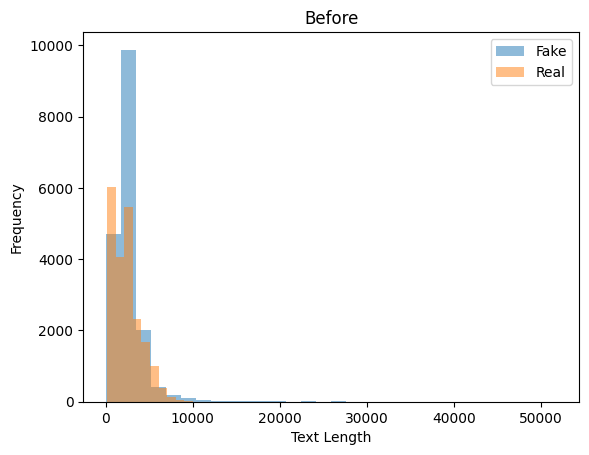

In [13]:
plt.hist(df.loc[df.label == 1, 'text_len'], bins=30, alpha=0.5, label='Fake')
plt.hist(df.loc[df.label == 0, 'text_len'], bins=30, alpha=0.5, label='Real')

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Before')

plt.show()

In [14]:
print(df[df['text_len'] < 50].shape)
df[df['text_len'] > 10_000].shape

(143, 6)


(204, 6)

In [15]:
df = df[df['text_len'] > 50]
df = df[df['text_len'] < 10_000]
df.reset_index(drop=True, inplace=True)
df.shape

(38298, 6)

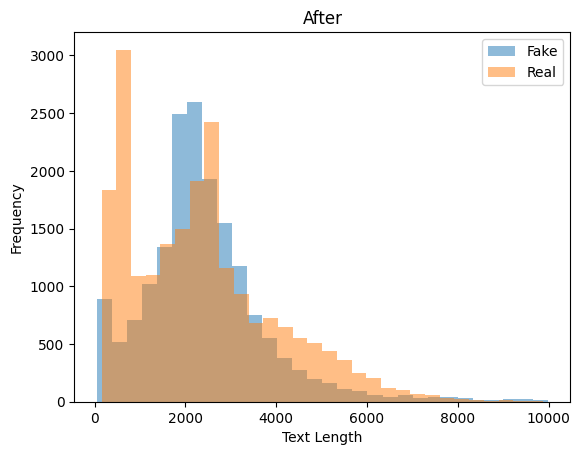

In [16]:
plt.hist(df.loc[df.label == 1, 'text_len'], bins=30, alpha=0.5, label='Fake')
plt.hist(df.loc[df.label == 0, 'text_len'], bins=30, alpha=0.5, label='Real')

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('After')

plt.show()

In [17]:
import re
import string
import sys
from unicodedata import category

import nltk as nlp
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pandarallel import pandarallel

STOPWORDS = set(stopwords.words('english'))
LEMMATIZER = WordNetLemmatizer()

pandarallel.initialize(progress_bar=True, verbose=1)

In [18]:
def processing_text(text: str, punctuation: str, remove_stop_words: bool = True) -> str:
    t = contractions.fix(text)
    t = t.lower()
    t = t.translate(str.maketrans('', '', punctuation))
    t = ' '.join([word for word in t.split() if not re.search('\d', word)])
    if remove_stop_words:
        t = ' '.join([word for word in t.split() if word not in STOPWORDS])
    t = ' '.join(list(filter(lambda x: len(x) > 5, [LEMMATIZER.lemmatize(word) for word in t.split()])))
    t = t.strip()
    return t

In [19]:
chrs = (chr(i) for i in range(sys.maxunicode + 1))
punctuation = set(c for c in chrs if category(c).startswith("P")) | set(string.punctuation)
punctuation=''.join(punctuation)
punctuation

'❭⸚⁖《𐮙𑈹𑙡﹃࿓︾༼𐮜࿚܋⟦𑗍\'𑙠⸦܂𑗏٭𑑍⸶𑇟𑗊᠊⟬―⸙︴⸱﹍٫⸨꧂*𐄁՝᭟~𑙫᛫﹉、❮꧁⦇᰼᪨⸠𐬹߸』𑗅{࠴؛‱༌꧃꧊⳼⸺𑙨᙮꩟𑁌꧅⁆﹐⁾।྅𑗗#〙؉⸏＆⸫𑙪᛬⸼﹠৽𝪇၌︱⟨⟩﹌࠽𑻸。・⌋⦄⸃༔“⹊「﹗⸷⹆𑅀‟꫱〃【𐽗‿〈⸩⸕｢⸌࿙𑙁𑂿꣸⹈𑓆᭜‧⸤꣺꩞᐀⦗〚﹡﹇𑗆𑗌}՚𑗓⹀𑈺៘!%⸅］࠻⁊𑱃⁞︺﹒₎︗⟪［﹅𑗉༎⸉︲𐩖⁜⳻⸜؟𑜾︻༉¡❵‼⹋‸⧙𖬻︶𑑋૰᪠⁚⸿﹜⸑𑂻᠁࠰፡｡：٪⸀⹂𑃀〞؞؍𐎟𐽙՞᪪꧞၎꘏𑑛༇𑱁⟆꧄܁⁕꧌﹚𖬹︷\\᜵〖﹊@࠼།᨞〉꛳❰፧‵𑱅–❫𐄂࠶‖܆⦉𐫶᱿𑗋𐩓︵+𑪜𒑱𖺚⦒៙𒑲⧽⦃࠳’᳆》⸰⦕᯼᠈᭝︼⦎꣎?᳁⦏[𑗔᠅⧚꛶༻᠃꥟༈／༏⸍꡶𖬸⸖𐩔֊၏‑⸧։࠷༆⸓⦐⳾⸬‹⁌፣᛭_꫟﹋𑜼𛲟〛⸇⸝𑱰︙︑𝪊᠄）⸒⧼፨𑩂܃־꓾⸈′＼;꧉𑇍𑩅﹛༒᳂＇𑁋⦌꡷๚⹉︐❪𐫵¶⹍”𑃁𑩃။꧋﹎‷꙾$❬᨟܈༊𑁈𑙬=⟭«᠀꩜᪣꣏⸘⸴﹘᳇𐩘𖬷᰾᥅𐩐＿⸁︒꡵︳𑇈𑗁•⸥𑠻𑪢،〽𑇛꡴﹄᯿܍꧇﹆﹫⸭‽𑅃᰽꯫｟𝪉¿⁃܄]〔᳃꤯𐫲𐬺％᪢⹄𑇅𑻷⁋𑙂․॰𐫰‘､〜᠇𑱱܀𑇝⦓𑁊࠸𑑝⦈𐩕𐽕﹔⁔…᚜꓿－𑑎‣𑇇︰᪫᠂࠲&﹕੶࠺෴⦖꫰᱾༄᰻꛴𐕯𐬼︕❲‴"꧈𐤟†⁐᪤᯽᪥❯𑂾॥⁽𑗈⁅࠵⌉᳅꛲⁁（･߷𖺙⁍⟮౷၍꘎၊𑙢࡞/𖭄⳺<𑗇𑧢𝪋＠⦅꤮𑙥᯾៚｛(𑅵⸔፤＃⹅𑗃׆𑗒|𐬿;፠>۔】⹇︹𑗂〰𑇆⦆𑂼—𑇞༅″‶𐬽𑪟‛⸞᜶𖫵,꧟𒑳︘︖𐤿𑪛៕❴⦋⟧࠱❳𒑴𐩒𑁍︸᪬⸟❨⸹𑗐𑈻︔᪩『⸆᳄﹑𖺘𑗕𑩆⁓⌈𑩁࿐﹟⌊࿔׀⸣︿‒⹌𐫴⸮﹞჻𑅴〝＂𐩗𑪠﹏𐽘՟᠆⸵𐬻⟯﴾‐𑩄※⁎༐〈𐫳⧘＊⁏𐩿𑗑𖬺꣹〉｝·．᪭‚⟫𑙤࿒‗𐫱𑱄︽᳀」܊׃⸛꣼𑙧״᪡𑅁⸳„⸽꛷⸊𐮛𖩯⸐꧆፦⸄！⸪〕𑱂؊〗𑪚﹀𑁇‥܇𖺗𑨿﴿❱⧛⸲።⟅꫞𐡗𑪞𖩮𑈸❩𒑰𐄀⁉⸡᭚༺﹪⸋𑙦⹁⁈𑗄^﹣𑙃𑙩𑊩⹎？᚛꛵𑿿₍𑈼᪦𑁉𑗎𑗖⁑﹙⁝᠉٬𐮚﹁𑑌᰿⳹；๏﹝಄:𖿢›་⁙⦘𑙣⵰‰⁀»𑩀꧍⸗꘍𐬾᭠՜⁂‾܅〟𑈽⹏𐽖-՛⦔꩝)𑑏﹖`⦊⳿༑𞥞⸻៖，⦑·๛⹃𑜽｣᥄⸢〘𐩑᭞⸎⸾⁗꙳𝪈⁘׳༽𑅂‡߹⦍𑪡︓࠾᭛⁛﹂𐏐។࿑፥܌｠﹨܉᳓§゠⁇𞥟࠹⸸.﹈⸂'

In [20]:
%%time

df['text_clean'] = df['text'].parallel_apply(lambda x: processing_text(x, punctuation))

CPU times: user 598 ms, sys: 557 ms, total: 1.16 s
Wall time: 8.16 s


In [21]:
df[['text', 'text_clean']].head(5)

,text,text_clean
0,LONDON (Reuters) - Britain s government said o...,london reuters britain government thursday leg...
1,PRAGUE (Reuters) - Andrej Babis say he wants t...,prague reuters andrej republic business upheav...
2,(Reuters) - Republican vice presidential candi...,reuters republican presidential candidate sund...
3,This is a great take on the foreign policy of ...,foreign policy administration
4,"MOSCOW (Reuters) - General Valery Gerasimov, t...",moscow reuters general valery gerasimov russia...


In [22]:
df.loc[0, 'text_clean']

'london reuters britain government thursday legislation country european addressing concern brexiteers negotiation opposition divorce government proposing change withdrawal currently making parliament listened member public parliament change remove confusion concern brexit minister statement previously implied twoyear negotiating period triggered explicitly stated minister theresa battling negotiation moving growing concern transitional smooth business complex future government facing parliament withdrawal central brexit strategy losing parliamentary majority illjudged election conservative deeply leaving support northern without defeat decision define brexit statement government prepared consider concession proposed political opponent important demonstrates pragmatic approach legislation member parliament improve whatever latest journey parliament tuesday wednesday lawmaker debate change proposed expected parliament'

In [23]:
from wordcloud import WordCloud

(-0.5, 1399.5, 799.5, -0.5)

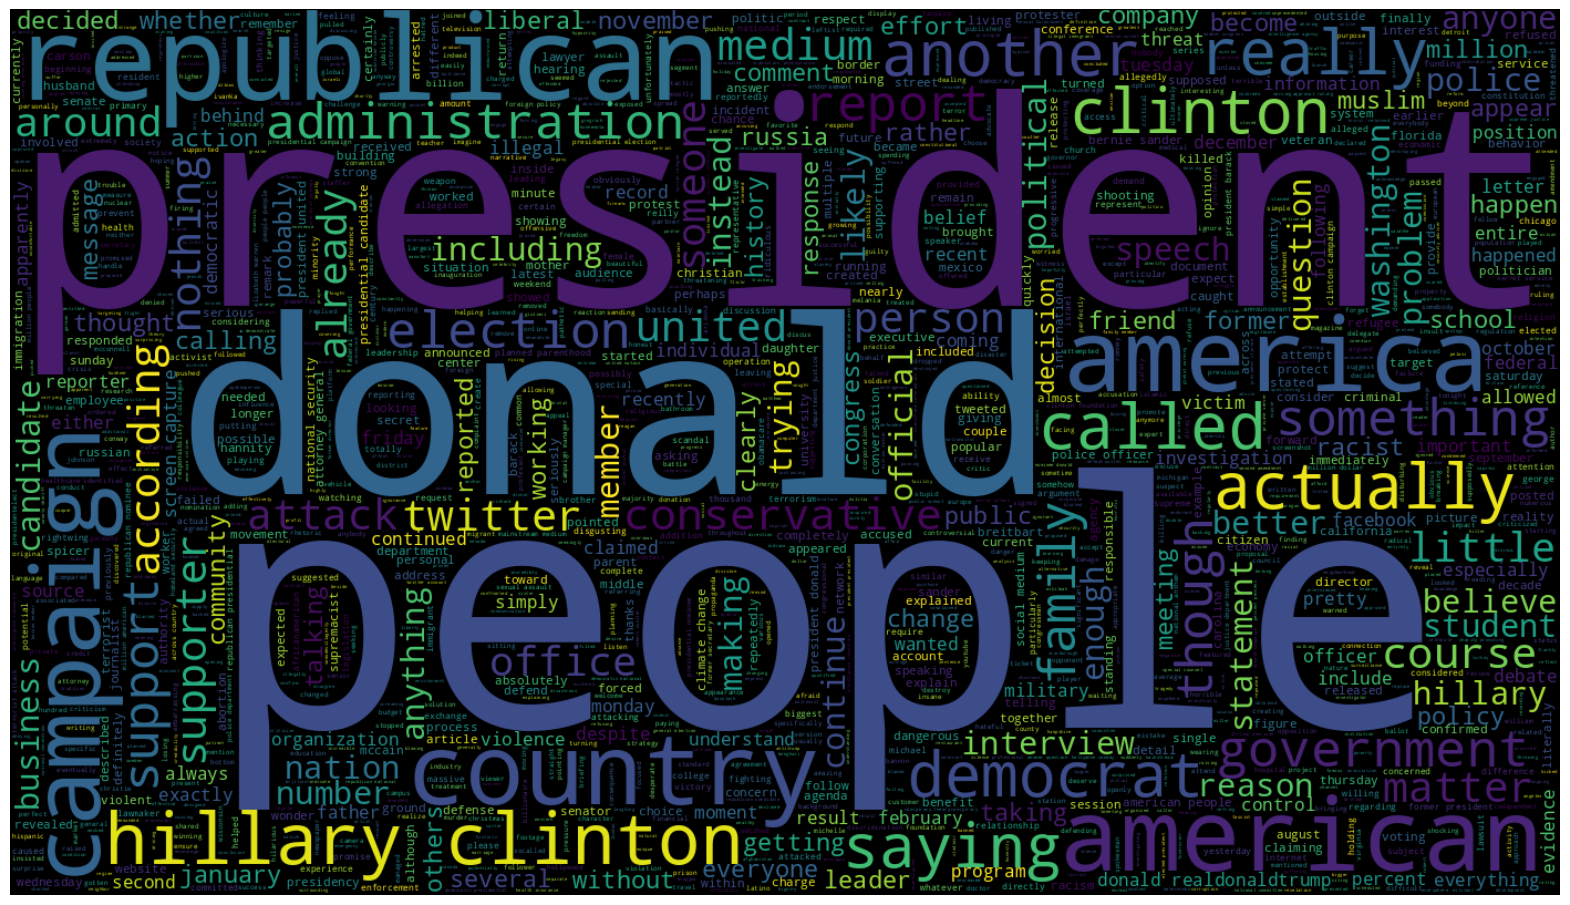

In [24]:
fake_words = " ".join(df.loc[df.label == 1, 'text_clean'])

plt.figure(figsize=(20, 16))
wc = WordCloud(width=1400 , height=800 , max_words=3000).generate(fake_words)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 1399.5, 799.5, -0.5)

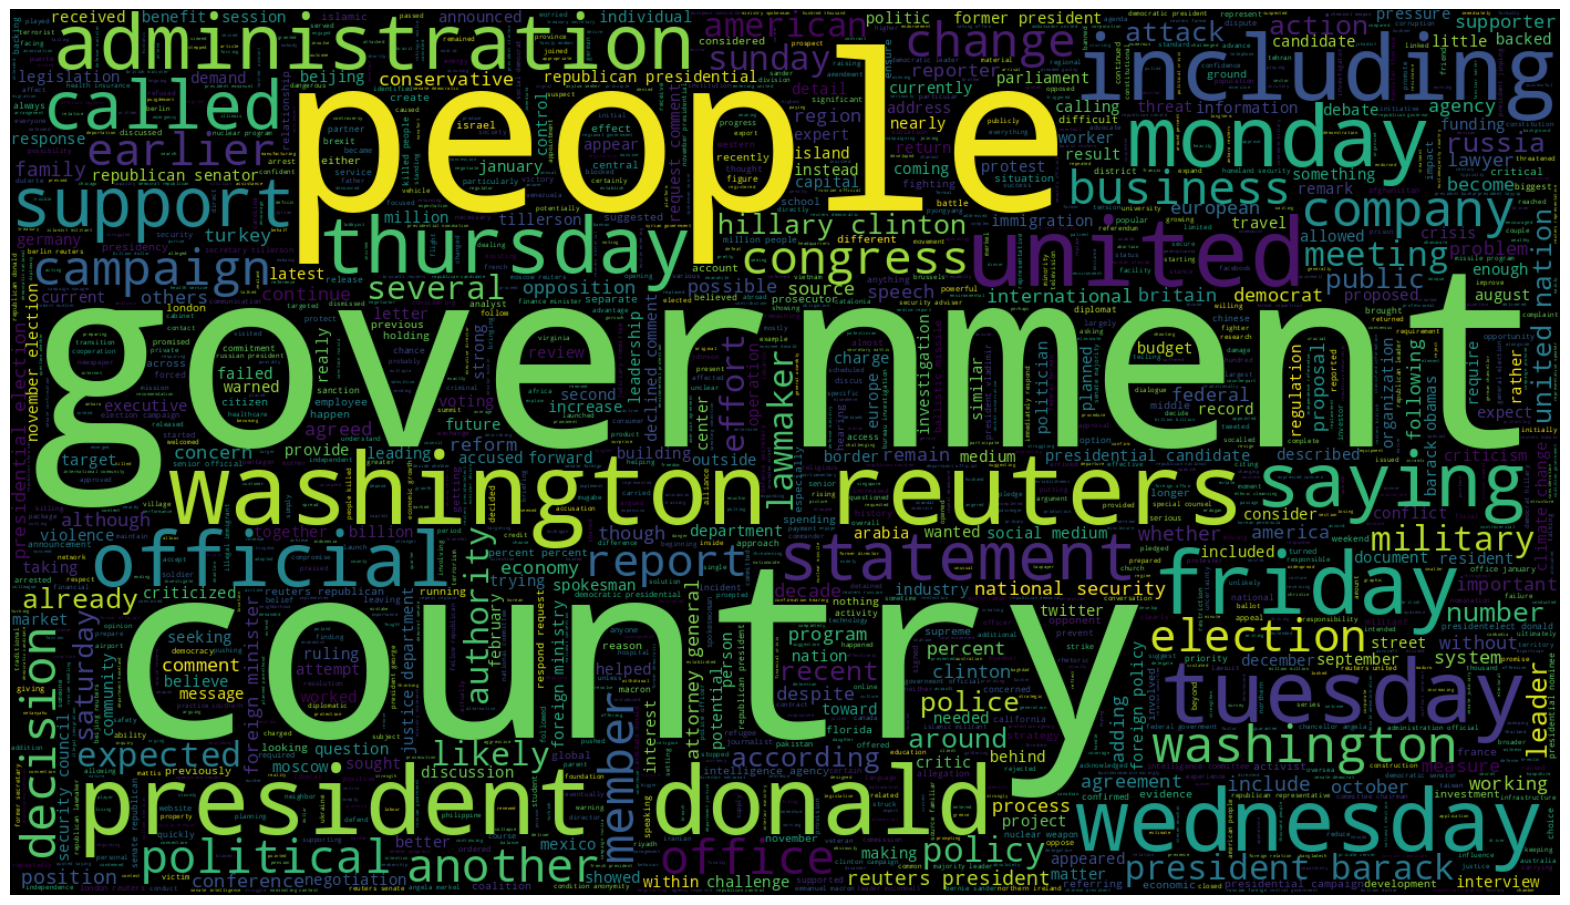

In [25]:
true_words = " ".join(df.loc[df.label == 0, 'text_clean'])

plt.figure(figsize=(20, 16))
wc = WordCloud(width=1400 , height=800 , max_words=3000).generate(true_words)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [26]:
from multiprocessing import cpu_count

import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [27]:
%%time
#BOW model for features

bow_vectorizer = CountVectorizer(lowercase=False, ngram_range=(1, 2), max_features=1000)
bow = bow_vectorizer.fit_transform(df['text_clean'])
bow.shape

CPU times: user 28.4 s, sys: 571 ms, total: 29 s
Wall time: 28.9 s


(38298, 1000)

In [28]:
%%time
#tfidf model for features

tfidf_vectorizer = TfidfVectorizer(lowercase=False, ngram_range=(1, 2), max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(df['text_clean'])
tfidf.shape

CPU times: user 24.9 s, sys: 437 ms, total: 25.4 s
Wall time: 25.3 s


(38298, 1000)

In [29]:
%%time
#word2vec model for features

RS = 47
tokenized_text = df['text_clean'].apply(lambda x: x.split())

w2v_model = Word2Vec(
     tokenized_text,
     vector_size=200,
     min_count=10,
     window=5,
     epochs=20,
     sg=1,
     sample=6e-5, 
     alpha=0.03, 
     min_alpha=0.0007, 
     negative=10,
     seed=RS,
     workers=cpu_count()
)

w2v_model.build_vocab(tokenized_text)

w2v_model.train(tokenized_text, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

CPU times: user 54min 14s, sys: 3.48 s, total: 54min 18s
Wall time: 3min 36s


(58731402, 100506220)

In [30]:
w2v_model.wv.index_to_key[:50]

['president',
 'republican',
 'people',
 'reuters',
 'donald',
 'government',
 'clinton',
 'country',
 'united',
 'election',
 'campaign',
 'official',
 'american',
 'washington',
 'former',
 'security',
 'leader',
 'national',
 'percent',
 'democrat',
 'million',
 'presidential',
 'political',
 'support',
 'administration',
 'statement',
 'hillary',
 'senate',
 'police',
 'democratic',
 'russia',
 'including',
 'office',
 'policy',
 'medium',
 'member',
 'attack',
 'foreign',
 'minister',
 'according',
 'candidate',
 'called',
 'military',
 'federal',
 'saying',
 'tuesday',
 'department',
 'america',
 'public',
 'report']

In [31]:
len(w2v_model.wv)

20586

In [32]:
w2v_model.wv.most_similar(positive=['islamic'], topn=10)

[('militant', 0.8021585941314697),
 ('jihadist', 0.7022051215171814),
 ('fighter', 0.6928385496139526),
 ('syrian', 0.6450408697128296),
 ('islamist', 0.6401381492614746),
 ('yousled', 0.6229974031448364),
 ('terrorist', 0.6182979941368103),
 ('ultrahardline', 0.614689826965332),
 ('fighting', 0.599216103553772),
 ('caliphate', 0.5882209539413452)]

In [33]:
#cross one out 
w2v_model.wv.doesnt_match(['president', 'democrat', 'terrorist'])

'terrorist'

In [34]:
w2v_model.wv.most_similar(positive=["police", "member"], negative= ["islamic"], topn=3)

[('officer', 0.587073028087616),
 ('arrest', 0.5013913512229919),
 ('arrested', 0.5007148385047913)]

In [35]:
w2v_model.wv['islamic'].shape

(200,)

In [36]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += w2v_model.wv[word].reshape((1, size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [37]:
wordvec_arrays = np.zeros((len(tokenized_text), 200)) 
for i in range(len(tokenized_text)):
    wordvec_arrays[i,:] = word_vector(tokenized_text[i], 200)
wordvec_arrays.shape

(38298, 200)

In [38]:
%%time
#doc2vec model for features

tagged_data = [TaggedDocument(words=doc.split(), tags=[i]) for i, doc in enumerate(df['text_clean'])]

d2v_model = Doc2Vec(
    tagged_data,
    vector_size=200,
    window=5, # width of the context window
    epochs=20,
    negative=10, # if > 0 then negative sampling will be used
    min_count=10, # Ignores all words with total frequency lower than 10.
    workers=cpu_count(),                                 
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    seed=RS
) 

d2v_model.build_vocab([i for i in tqdm(tagged_data)])

d2v_model.train(tagged_data, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

100%|████████████████████████████████| 38298/38298 [00:00<00:00, 1052636.97it/s]


CPU times: user 24min 4s, sys: 2min 30s, total: 26min 34s
Wall time: 10min 16s


In [39]:
docvec_arrays = np.zeros((len(tagged_data), 200)) 
for i in range(len(tagged_data)):
    docvec_arrays[i,:] = d2v_model.dv[i].reshape((1, 200))    
docvec_arrays.shape

(38298, 200)

In [40]:
tagged_data[0]

TaggedDocument(words=['london', 'reuters', 'britain', 'government', 'thursday', 'legislation', 'country', 'european', 'addressing', 'concern', 'brexiteers', 'negotiation', 'opposition', 'divorce', 'government', 'proposing', 'change', 'withdrawal', 'currently', 'making', 'parliament', 'listened', 'member', 'public', 'parliament', 'change', 'remove', 'confusion', 'concern', 'brexit', 'minister', 'statement', 'previously', 'implied', 'twoyear', 'negotiating', 'period', 'triggered', 'explicitly', 'stated', 'minister', 'theresa', 'battling', 'negotiation', 'moving', 'growing', 'concern', 'transitional', 'smooth', 'business', 'complex', 'future', 'government', 'facing', 'parliament', 'withdrawal', 'central', 'brexit', 'strategy', 'losing', 'parliamentary', 'majority', 'illjudged', 'election', 'conservative', 'deeply', 'leaving', 'support', 'northern', 'without', 'defeat', 'decision', 'define', 'brexit', 'statement', 'government', 'prepared', 'consider', 'concession', 'proposed', 'political',

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

In [42]:
def print_conf_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
  
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

    cm_display.plot()
    plt.show()

In [43]:
xtrain_bow, xtest_bow, ytrain, ytest = train_test_split(bow, df['label'], random_state=RS, test_size=0.3)

In [44]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=cpu_count(), random_state=RS).fit(xtrain_bow, ytrain)
prediction = rf.predict(xtest_bow) 
f1_score(ytest, prediction)

0.9937414433796207

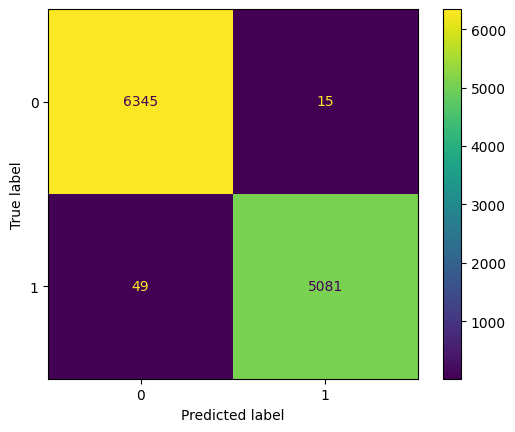

In [45]:
print_conf_matrix(ytest, prediction)

In [46]:
xtrain_tfidf = tfidf[ytrain.index]
xtest_tfidf = tfidf[ytest.index]

rf = RandomForestClassifier(n_estimators=100, n_jobs=cpu_count(), random_state=RS).fit(xtrain_tfidf, ytrain)
prediction = rf.predict(xtest_tfidf) 
f1_score(ytest, prediction)

0.9935471255377395

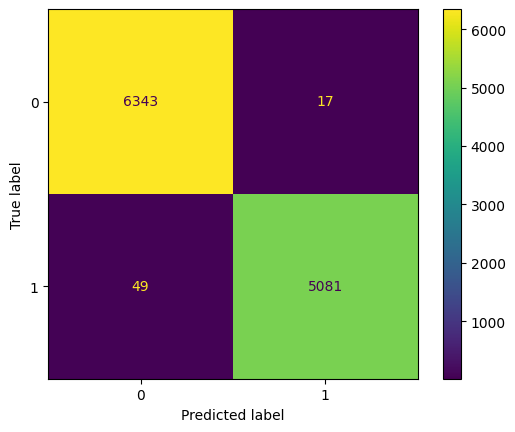

In [47]:
print_conf_matrix(ytest, prediction)

In [48]:
xtrain_wordvec = wordvec_arrays[ytrain.index]
xtest_wordvec = wordvec_arrays[ytest.index]

rf = RandomForestClassifier(n_estimators=100, n_jobs=cpu_count(), random_state=RS).fit(xtrain_wordvec, ytrain)
prediction = rf.predict(xtest_wordvec) 
f1_score(ytest, prediction)

0.9284018987341772

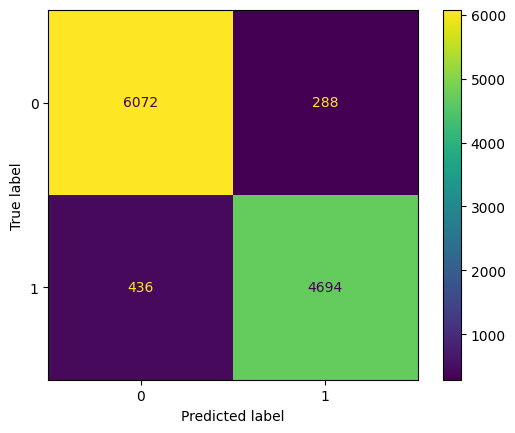

In [49]:
print_conf_matrix(ytest, prediction)

In [50]:
xtrain_docvec = docvec_arrays[ytrain.index]
xtest_docvec = docvec_arrays[ytest.index]

rf = RandomForestClassifier(n_estimators=100, n_jobs=cpu_count(), random_state=RS).fit(xtrain_docvec, ytrain)
prediction = rf.predict(xtest_docvec) 
f1_score(ytest, prediction)

0.9168088309081788

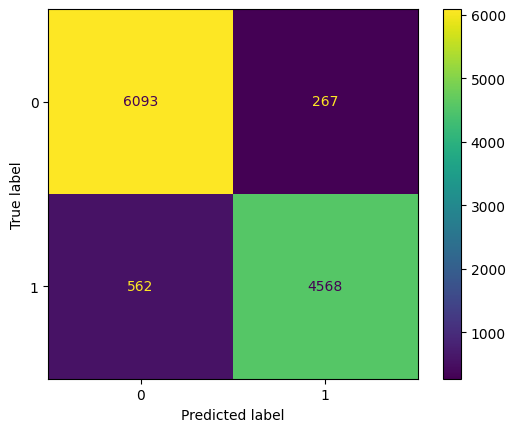

In [51]:
print_conf_matrix(ytest, prediction)

# Summarization (BoW, W2V)

In [175]:
from typing import List

from scipy.spatial.distance import cosine

In [186]:
# for w2v model
def get_cosine_sim(tokens, model, arr: np.ndarray) -> List[float]:
    cosine_vals = []
    for word in tokens:
        try:
            word_vector = model.wv[word]
            cosine_vals.append(cosine(word_vector, arr))
        except KeyError:
            cosine_vals.append(0)
    return cosine_vals


def summarize(series: pd.Series, featurizer_type: str) -> None:
    assert featurizer_type in ['bow', 'w2v']
    
    tokenized_text_clean = np.array(series.text_clean.split())
    
    if featurizer_type == 'bow':
        sentence_vector = bow.toarray()[series.name]
        selected_indices = np.where(sentence_vector > np.mean(sentence_vector))[0]
        
        selected_words = bow_vectorizer.get_feature_names_out()[selected_indices]
        mask = np.in1d(tokenized_text_clean, selected_words)
        selected_words_ordered = tokenized_text_clean[mask]
    else:
        cosine_vals = get_cosine_sim(tokenized_text_clean, w2v_model, wordvec_arrays[series.name])
        selected_indices = np.where(cosine_vals > np.mean(cosine_vals))[0]
        
        selected_words_ordered = tokenized_text_clean[selected_indices]
        
    summarized_text = ' '.join(selected_words_ordered.tolist())
    print(f"====> Original <====\n{series.text}\n\n====> Summarized <====\n{summarized_text}")

In [183]:
summarize(df.iloc[5], 'bow')

====> Original <====
WASHINGTON (Reuters) - U.S. President Donald Trump predicted on Sunday that Senator Jeff Flake will oppose the Republican tax bill, but the senator’s office says he has not yet made up his mind. “Senator Flake is still reviewing the tax reform bill on its merits. How he votes on it will have nothing to do with the president,” a spokesman for the senator said in an email.  That is contrary to an assertion made by Trump on Sunday in a post on Twitter. “He’ll be a NO on tax cuts because his political career anyway is ‘toast.’,” Trump wrote of Flake on Twitter.  Where individual Republican senators stand on the tax bill has become the focus of those trying to determine whether it will pass because Republicans control only 52 seats in the Senate.  More than two Republican defections would likely kill the bill. Wisconsin Senator Ron Johnson has already publicly stated he opposes the bill in its current form. The House voted last week to approve the tax bill with no suppo

In [184]:
summarize(df.iloc[5], 'w2v')

====> Original <====
WASHINGTON (Reuters) - U.S. President Donald Trump predicted on Sunday that Senator Jeff Flake will oppose the Republican tax bill, but the senator’s office says he has not yet made up his mind. “Senator Flake is still reviewing the tax reform bill on its merits. How he votes on it will have nothing to do with the president,” a spokesman for the senator said in an email.  That is contrary to an assertion made by Trump on Sunday in a post on Twitter. “He’ll be a NO on tax cuts because his political career anyway is ‘toast.’,” Trump wrote of Flake on Twitter.  Where individual Republican senators stand on the tax bill has become the focus of those trying to determine whether it will pass because Republicans control only 52 seats in the Senate.  More than two Republican defections would likely kill the bill. Wisconsin Senator Ron Johnson has already publicly stated he opposes the bill in its current form. The House voted last week to approve the tax bill with no suppo

# Named Entity Recognition

In [204]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

ner_results = nlp(df.iloc[3].text)
print(ner_results)

[{'entity': 'B-PER', 'score': 0.9984301, 'index': 12, 'word': 'Obama', 'start': 50, 'end': 55}]


In [206]:
df.iloc[3].text

'This is a great take on the foreign policy of the Obama administration! '

In [208]:
su = "reuters predicted oppose reviewing reform spokesman contrary assertion career anyway individual become determine control defection wisconsin johnson publicly stated opposes approve defecting critical delivered speech october threatened nation democracy speech seeking reelection expires critical reelection arizona overheard nearby microphone become television station microphone recorded alabama sexual misconduct allegation december special intentionally unelectable arizona anemic caught purposely favorite"

In [209]:
ner_results = nlp(su)
print(ner_results)

[{'entity': 'B-ORG', 'score': 0.99411243, 'index': 1, 'word': 're', 'start': 0, 'end': 2}]
